In [1]:
import numpy as np
import pandas as pd
import regex as re
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt

### Generate KMeans Cluster 

### Data cleaning: cluster.txt
- 3 clusters: Head, Ear_Left, Ear_Right
- 2 classes - (x,y) pair per cluster
- Data per cluster is in the format: `<x> <y> <cluster_name>`
- Below code to extract the section of data which consists of data in the above format. Other unwanted characters to be ignored

In [2]:
clusters = ['Head', 'Ear_Left', 'Ear_Right']
exclude_pattern = re.compile(r'[\#]')
num_clusters = len(clusters)

In [3]:
def clean_data_and_get_cluster_class(filei):
    """This function will preprocess the input data & remove the unwanted characters.
    Input - input file aka raw data
    Output - returns a dataframe that consists of pairs of data points (x,y) & cluster label
    """
    clst_cls = {clst: {'x':[], 'y':[]} for clst in clusters}
    with open(filei, 'r') as f:
        for line in f:
            pat = exclude_pattern.search(line.strip())
            if not pat:  #if unwanted characters not found --> proceed
               contents = line.strip().split()
               if(len(contents)==3):
                   for c in clusters:
                       if(c.lower() == contents[2].lower()):
                            try:
                                float_x = float(contents[0])
                                float_y = float(contents[1])
                                #print(c, float_x, float_y)
                                clst_cls[c]['x'].append(float_x)
                                clst_cls[c]['y'].append(float_y)
                            except ValueError:
                                continue

    return clst_cls

In [4]:
cleaned_clstr_class_dict = clean_data_and_get_cluster_class('cluster.txt')
cleaned_clstr_cls_df = pd.concat({cluster: pd.DataFrame(class_) for cluster, class_ in cleaned_clstr_class_dict.items()},\
                                 names=['cluster_name']).reset_index(level='cluster_name').reset_index(drop=True)

In [5]:
cleaned_clstr_cls_df

,cluster_name,x,y
0,Head,0.456601,0.432806
1,Head,0.611378,0.528625
2,Head,0.450299,0.711606
3,Head,0.639015,0.460744
4,Head,0.628957,0.323470
...,...,...,...
485,Ear_Right,0.824842,0.713416
486,Ear_Right,0.823959,0.767519
487,Ear_Right,0.815515,0.713517
488,Ear_Right,0.785691,0.681914


In [6]:
actual_num_heads = cleaned_clstr_cls_df[cleaned_clstr_cls_df.cluster_name == 'Head'].shape[0]
actual_num_ear_left = cleaned_clstr_cls_df[cleaned_clstr_cls_df.cluster_name == 'Ear_Left'].shape[0]
actual_num_ear_right = cleaned_clstr_cls_df[cleaned_clstr_cls_df.cluster_name == 'Ear_Right'].shape[0]
print("Actual # Heads:", actual_num_heads)
print("Actual # Ear Left:", actual_num_ear_left)
print("Actual # Ear Right:", actual_num_ear_right)

Actual # Heads: 290
Actual # Ear Left: 100
Actual # Ear Right: 100


In [7]:
cleaned_class_data = cleaned_clstr_cls_df.select_dtypes(include='float').to_numpy()
cleaned_class_data

array([[0.45660138, 0.43280641],
       [0.61137847, 0.5286246 ],
       [0.45029897, 0.71160612],
       [0.63901505, 0.46074398],
       [0.62895678, 0.32346951],
       [0.56621044, 0.28935773],
       [0.56765304, 0.29547266],
       [0.43602399, 0.41577573],
       [0.54541379, 0.36750178],
       [0.43945281, 0.54786743],
       [0.51220044, 0.50086465],
       [0.39175878, 0.6103473 ],
       [0.52185703, 0.57690608],
       [0.71941896, 0.43648094],
       [0.29953293, 0.62306273],
       [0.49822415, 0.42839984],
       [0.27405229, 0.48043206],
       [0.38284022, 0.54406889],
       [0.4249232 , 0.28482573],
       [0.52072382, 0.32542734],
       [0.44329558, 0.32697892],
       [0.39882122, 0.44917758],
       [0.50434998, 0.31104973],
       [0.64183164, 0.4463423 ],
       [0.38751391, 0.58357767],
       [0.39399361, 0.43554923],
       [0.53104101, 0.62956496],
       [0.68889681, 0.52416314],
       [0.64939623, 0.37410916],
       [0.46558805, 0.38082603],
       [0.

In [8]:
num_data = cleaned_class_data.shape[0]
print("Total number of data points after cleaning:" , num_data)

Total number of data points after cleaning: 490


### Calculating Kmeans to determine the clusters 
- We determine the centroids to predict the clusters or labels of the input data

In [160]:
centroids, predicted_labels = kmeans2(cleaned_class_data, k = num_clusters)
print("Centroids are:", centroids)  
print("Predicted clusters or labels are:" , predicted_labels)

Centroids are: [[0.49059488 0.44459279]
 [0.27989435 0.72998987]
 [0.7084826  0.69120172]]
Predicted clusters or labels are: [0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 1 2 0 0 0
 0 0 1 0 0 0 2 0 0 0 1 0 0 0 2 0 1 0 2 0 2 1 0 0 0 1 1 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 1 2 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 1 2 0 0 1 0
 0 0 0 0 0 2 0 0 0 0 0 0 1 0 2 2 1 0 0 0 0 2 0 2 1 0 0 1 2 0 1 2 0 1 0 0 2
 0 0 1 0 0 0 1 0 2 0 2 2 0 0 2 2 0 0 0 0 2 0 2 0 0 0 2 0 0 1 0 0 1 0 2 0 0
 0 0 0 0 0 2 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 2 1 2 0 2 0 0 2 0 0
 1 1 0 2 0 0 0 0 0 2 0 0 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 2 0
 2 2 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 2 2 2 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [161]:
counts = np.bincount(predicted_labels)
print(counts)
print("Kmeans2 Predicted # Heads:", counts[0])
print("Kmeans2 Predicted # Ear Left:", counts[1])
print("Kmeans2 Predicted # Ear Right:", counts[2])

[203 129 158]
Kmeans2 Predicted # Heads: 203
Kmeans2 Predicted # Ear Left: 129
Kmeans2 Predicted # Ear Right: 158


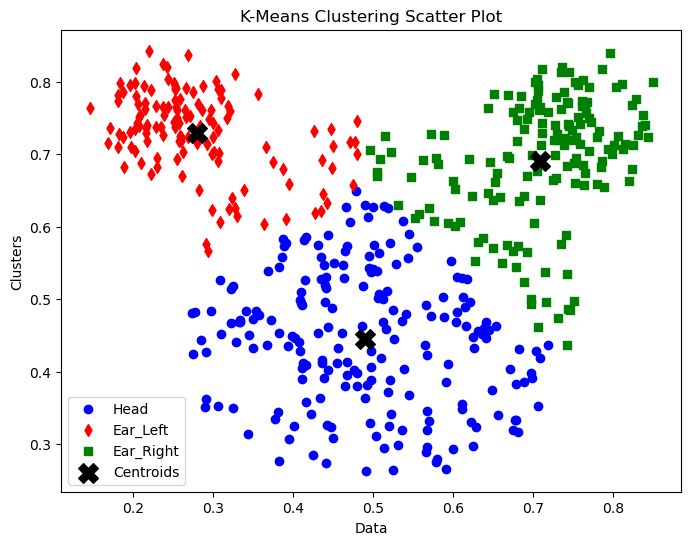

In [162]:
def plot_clusters(data, pred_labels, centroid, plotname):
    """This function will generate a scattered plot that will color code the data points based on their assigned clusters.
    """
    plt.figure(figsize=(8, 6))

    plt.scatter(data[pred_labels == 0, 0], data[pred_labels == 0, 1], c='blue', marker = 'o', label=clusters[0])
    plt.scatter(data[pred_labels == 1, 0], data[pred_labels == 1, 1], c='red', marker = 'd', label=clusters[1])
    plt.scatter(data[pred_labels == 2, 0], data[pred_labels == 2, 1], c='green', marker = 's', label=clusters[2])
    
    plt.scatter(centroid[:, 0], centroid[:, 1], s=200, c='black', marker='X', label='Centroids')
    
    plt.xlabel('Data')
    plt.ylabel('Clusters')
    plt.title(f'{plotname} Clustering Scatter Plot')
    plt.legend()
    
    plt.show()

plot_clusters(cleaned_class_data, predicted_labels, centroids,'K-Means')

### Creating a map for actual labels
- KMeans predicted or assigned some labels to the input data. There are 3 labels: 0,1,2 $\rightarrow$ which are numeric
- Actual labels: `Head, Ear_Left, Ear_Right` are categorical. We map the categorical labels to numeric values similar to the kmeans prediction & generate actual labels numerically

In [148]:
label_map = dict(zip(clusters, [0,1,2]))
print(label_map)

{'Head': 0, 'Ear_Left': 1, 'Ear_Right': 2}


In [163]:
categorical_labels = cleaned_clstr_cls_df['cluster_name']
#print(categorical_labels)
true_labels = np.array([label_map[label] for label in categorical_labels])
print(true_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


### Determining the confusion matrix

In [194]:
def gen_confusion_matrix(actual, preds):
    """Computes confusion matrix"""
    return pd.crosstab(actual, preds, rownames = ['Actual'], colnames = ['Predicted'])
cm = gen_confusion_matrix(true_labels, predicted_labels)
cm

Predicted,0,1,2
Actual,,,
0,203,29,58
1,0,100,0
2,0,0,100


### Accuracy

In [211]:
def calc_accuracy(confusion_matrix):
    """This function computes the respective label accuracies."""
    accuracies = {}
    cm_array = np.array(confusion_matrix)
    for i in range(len(cm_array)):
        true_positives = cm_array[i, i]
        total_instances = np.sum(cm_array[i, :])  # Sum of the row
        accuracy = true_positives / total_instances
        accuracies[f'Cluster_{i}'] = accuracy
    return accuracies
accuracy = calc_accuracy(cm)
print("Kmeans2 Accuracy of Cluster_0 aka Heads:", accuracy['Cluster_0'])
print("Kmeans2 Accuracy of Cluster_1 aka Ear_Left:", accuracy['Cluster_1'])
print("Kmeans2 Accuracy of Cluster_2 aka Ear_Right:", accuracy['Cluster_2'])

Kmeans2 Accuracy of Cluster_0 aka Heads: 0.7
Kmeans2 Accuracy of Cluster_1 aka Ear_Left: 1.0
Kmeans2 Accuracy of Cluster_2 aka Ear_Right: 1.0


### EMM Calculation
- Mixture components imply clusters. We have `K=3` mixture components
- Mixture parameters per cluster refer to `Mean, Variance, Weights` per component
- **E-step** $\rightarrow$ To estimate membership probability for each component
- **M-step** $\rightarrow$ To update the mixture parameter using the membership probability from E-step as weighted parameter

### Step1: Initialize mixture parameter
- Output of KMeans predicted labels to be initialized as one-hot encoded membership probability.
- Then compute initial mixture parameters - mean, variance & weights

#### One-hot encoded membership probability
- Membership probability of $k^{th}$ cluster is 1, while others are 0
- So, all datapoints in $k^{th}$ cluster will have membership probability as $\gamma_k(x_n)=1$ while data points that do NOT belong to $k^{th}$ cluster will have 0 probability
- Example - For $k=1$, `cluster 1`, the initial mixture parameters are:
  - Membership probability: $$\gamma_1(x_n)=1$$
  - Mean: $$\mu_1 = \frac{\Sigma_{n=1}^N \gamma_1(x_n)x_n}{\Sigma_{n=1}^N \gamma_1(x_n)} = \frac{\Sigma_{x_n \in k=1}{x_n}}{N_1}$$
  - Weight: $$w_1 = \frac{\Sigma_{n=1}^N \gamma_1(x_n)}{N} = \frac{N_1}{N}$$
  - Covariance: $$\Sigma_1 = \frac{\Sigma_{n=1}^N \gamma_1(x_n) (x_n - \mu_1) (x_n - \mu_1)^{T}}{\Sigma_{n=1}^N \gamma_1(x_n)} = \frac{\Sigma_{n=1}^N (x_n - \mu_1) (x_n - \mu_1)^{T}}{N_1}$$

Here, when $\gamma_k(x_n)=1$, $\Sigma_{n=1}^N$ is $N_k$ i.e number of data points in $k^{th}$ cluster whereas $N$ is the total number of data points from all clusters. This is how we derive for other clusters too..


In [172]:
def convert_preds_ohe(k, labels):
    return np.eye(k)[labels]
ohe_pred_labels = convert_preds_ohe(num_clusters, predicted_labels)
print("One-hot encoded membership probabilities:\n", ohe_pred_labels)
print(ohe_pred_labels.shape)

One-hot encoded membership probabilities:
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(490, 3)


In [196]:
def compute_initial_params(data, ohe_preds, N, k_clusters):
    """This function will compute the initial parameters: mean, weight & covariance.
    Input: 
    data - pre-processed dataframe containing pair of data points (x,y)
    ohe_preds - one-hot encoding of labels predicted by scipy's kmeans. They are referred as initial membership probabilities. 
    N = total # data points in the pre-processed data
    k_clusters = Total # clusters

    Output: Returns arrays for initial mean, initial weight & initial covariance.    
    """
    ini_mu_k = []
    ini_wt_k = []
    ini_cov_k = []

    for k in range(k_clusters):
        # Use one-hot encoding to get the points for the current cluster
        cluster_k_points = data[ohe_preds[:, k] == 1] #Extract all rows with probability 1. These rows belong to kth cluster
    
        #Get total number of datapoints in kth cluster
        N_k = len(list(cluster_k_points))
    
        #Get mean of kth cluster
        mu_k = np.mean(cluster_k_points, axis=0)   
        #Get weight of kth cluster
        wt_k = N_k/N
    
        #Get covariance of kth cluster
        sigma_sum = 0
        for xn in cluster_k_points:
            centered_diff = xn - mu_k
            sigma_sum += np.outer(centered_diff, centered_diff) #(x-muk).(x-muk)^T = element-wise dot product of 2 1D vectors
        cov_k = sigma_sum/N_k
        
        ini_mu_k.append(mu_k)
        ini_wt_k.append(wt_k)
        ini_cov_k.append(cov_k)

    mat_ini_mu_k = np.array(ini_mu_k)
    mat_ini_wt_k = np.array(ini_wt_k)
    mat_ini_cov_k = np.array(ini_cov_k)

    return mat_ini_mu_k, mat_ini_wt_k, mat_ini_cov_k

In [197]:
mu_ki, wt_ki, cov_ki = compute_initial_params(cleaned_class_data, ohe_pred_labels, num_data, num_clusters)
print("Initial mean:", mu_ki)
print("Initial weight:", wt_ki)
print("Initial covariance:", cov_ki)

Initial mean: [[0.49059488 0.44459279]
 [0.27989435 0.72998987]
 [0.7084826  0.69120172]]
Initial weight: [0.41428571 0.26326531 0.32244898]
Initial covariance: [[[ 0.01158207 -0.0016246 ]
  [-0.0016246   0.0084648 ]]

 [[ 0.0061506  -0.00188227]
  [-0.00188227  0.00320048]]

 [[ 0.00627471  0.00184971]
  [ 0.00184971  0.00747876]]]


In [198]:
print("Dimension of initial_mean:", mu_ki.shape)
print("Dimension of initial_weight:", wt_ki.shape)
print("Dimension of initial_covariance:", cov_ki.shape)

Dimension of initial_mean: (3, 2)
Dimension of initial_weight: (3,)
Dimension of initial_covariance: (3, 2, 2)


### Step2: Calculate $f(x; \mu_k, \Sigma_k)$ for d-dimensionality jointly Gaussian pdf:
- For any `d`, $f$ is given by:
$$f(x; \mu_k, \Sigma_k) = \frac{exp(-0.5(x-\mu_k)^{T}\Sigma_k^{-1}(x-\mu_k))}{\sqrt{(2\pi)^{d}|\Sigma_k|}}$$
- Cluster data has a pair of points `(x,y)` refering to 2 classes. Hence, $x$ is in 2D. Thus, for `d=2`, $f$ is given by:
  $$f(x; \mu_k, \Sigma_k) = \frac{exp(-0.5(x-\mu_k)^{T}\Sigma_k^{-1}(x-\mu_k))}{\sqrt{(2\pi)^{2}|\Sigma_k|}}$$

In [199]:
def f_val(xy, mu, cov, d):
    """This function will calculate the d-dimensionality jointly Gaussian pdf.
    Input: 
    xy - pair of datapoint (x,y)
    mu - mean of kth cluster
    cov - covariance of kth cluster
    d - dimensionality of datapoint
    Output: Returns the Gaussian pdf
    """
    diff = xy - mu
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    val_num = np.exp(-0.5*np.dot(np.dot(diff.T, inv_cov), diff))
    val_denom = np.sqrt((2 * np.pi) ** d * det_cov)
    f = val_num/val_denom
    return f

### Step3: Compute E-step & get the cluster assignments
- `E-step`: Update the membership probability $\gamma$ matrix
- Get the cluster assignments: Assign each datapoint to the cluster that has the maximum $\gamma$

In [200]:
def E_step(wt, meank, covk, data, k_clusters, N):
    """This function will compute the membership probability during E-step.
    Input: 
    wt - Weight i.e (kx1) vector
    meank - mean of kth cluster i.e kxd vector
    covk - covariance of kth cluster i.e kxdxd matrix
    data - input cleaned raw data
    k_clusters - Total # clusters
    N - Total # datapoints

    Output: Returns an updated gamma aka membership probability
    """
    gamma = np.zeros((N, k_clusters))
    for k in range(k_clusters):
        for n in range(N):
            gamma[n,k] = wt[k]*f_val(data[n], meank[k], covk[k], data[n].shape[0])
    gamma = gamma/gamma.sum(axis=1, keepdims=True)   #normalize
    return gamma
    
def cluster_assignments(gamma):
    return np.argmax(gamma, axis=1)

### Step4: Compute M-step
- Use the membership probability $\gamma$ matrix calculated in `E-step`
- Update mixture params like mean $\mu$, covariance $\Sigma$ & weight $w$ for all datapoints using membership probbaility from `E-step`

In [202]:
def M_step(data, mean, cov, wt, gamma, k_clusters, N):
    """This function will compute the mixture parameters during M-step.
    Input: 
    data - The cleaned raw data set [(Nxd) array, d - dimensionality of the datapoints]
    mean - kxd matrix containing mean of all the k clusters (This is initialized to 0s)
    cov - kxdxd matrix containing covariance of all the k clusters (This is initialized to 0s)
    wt - kx1 vector containing weights of all the k clusters (This is initialized to 0s)
    gamma - membership probability of size Nxk (N = #data points)
    k_clusters - Total # clusters
    N - Total # datapoints

    Output: Returns the updated mean, covariance & weight matrices/vectors    
    """
    for k in range(k_clusters):
        gamma_k = gamma[:,k]
        #normalize gamma
        norm_gamma_k = np.sum(gamma_k)
        #Calculate mean per cluster
        weighted_mean = gamma_k.reshape(-1,1)*data     #reshaping to broadcast
        mean[k] = np.sum(weighted_mean, axis=0, keepdims=True)/norm_gamma_k #1xd per cluster; #k x d for k clusters
        #Calculate weight per cluster
        wt[k] = norm_gamma_k/num_data  #k x 1
        #Calculate covariance per cluster
        d = data.shape[1]   #dimensionality of dataset
        weighted_sum = np.zeros((d,d))
        for n in range(N):
            diff = data[n] - mean[k] 
            weighted_sum += gamma_k[n] * np.outer(diff, diff)
        cov[k] = weighted_sum / norm_gamma_k
    return mean, wt, cov

### Step5: Compute Convergence Metric

In [203]:
def convergence_metric(data, mu_k, cov_k, wt_k, k_clusters, N):
    """Compute convergence metric aka log-likelihood.
    Input:
    data - The cleaned raw data set [(Nxd) array, d - dimensionality of the datapoints]
    mu_k - kxd matrix containing mean of all the k clusters
    cov_k- kxdxd matrix containing covariance of all the k clusters 
    wt_k - kx1 vector containing weights of all the k clusters
    k_clusters - total # clusters
    N - total # datapoints

    Output: Returns the log likelihood
    """
    log_likelihood = 0
    
    for n in range(N):
        likelihood_n = 0
        for k in range(k_clusters):
            likelihood_n += wt_k[k] * f_val(data[n], mu_k[k], cov_k[k], data.shape[1])
        log_likelihood += np.log(likelihood_n)

    return log_likelihood   

### Step6: EM iteration
- Merge all steps into one main function to compute the EM iteration
- Input predicted labels from Q1(a) to initialize mixture parameters
- Update $\gamma_k$ from E-step
- Update $\mu_k, \Sigma_k, w$ from M-step
- Get cluster assignments using the $\gamma_k$ from E-step. They denote the predicted cluster labels by EM
- Calculate log-likelihood aka convergence metric at end of EM-step for each iteration
- Plot cluster labels for first 4 iterations

In [217]:
def EMM(data, max_iter, initial_preds, actual_labels, k, verbose=False):
    """This function will perform the EM algorithm.
    Input:
    data - cleaned raw data
    max_iter - max # EM iterations or epochs need to run 
    initial_preds - predicted labels from KMeans2 or Q1(a)
    actual_labels - actual cluster labels of the input dataset
    k - # clusters
    verbose - to print info

    Output: 
    final_params - Dictionary of final updated mixture parameters at the end of EM iteration 
    likelihood_list - List of log likelihoods recorded at every iteration 
    """
    ohe_labelsi = convert_preds_ohe(k, initial_preds)
    N = data.shape[0]
    #Initialize mixture params
    mean_k, weight_k, covar_k = compute_initial_params(data, ohe_labelsi, N, k)
    #Get the default initial matrices which have to be updated every iteration
    num_iter = 0
    emm_preds_iter = []
    likelihood_list = []
    likelihood_old = -np.inf #initializing likelihood
    tol = 1e-06   #tolerance limit for conergence check
    #Run EM iterations
    for i in range(max_iter):
        #compute E-step
        gamma_k = E_step(weight_k, mean_k, covar_k, data, k, N)
        #get cluster assignments aka EM predicted labels
        emm_preds_i = cluster_assignments(gamma_k)
        emm_preds_iter.append(emm_preds_i)
        #compute M-step
        mean_k, weight_k, covar_k = M_step(data, mean_k, covar_k, weight_k, gamma_k, k, N)
        #get convergence metric aka log likelihood
        likelihood = convergence_metric(data, mean_k, covar_k, weight_k, k, N)
        likelihood_list.append(likelihood)

        counts = np.bincount(emm_preds_i)
        cm_ = gen_confusion_matrix(actual_labels, emm_preds_i)
        accuracy = calc_accuracy(cm_)

        if(verbose):
            print(f'Epoch: {i}, log_likelihood: {likelihood}')
            print(f'Cluster_0 (Heads) accuracy: {accuracy['Cluster_0']}')
            print(f'Cluster_1 (Ear_Left) accuracy: {accuracy['Cluster_1']}')
            print(f'Cluster_2 (Ear_Right) accuracy: {accuracy['Cluster_2']}')
        if(i < 4):
            plot_clusters(data, emm_preds_i, mean_k, f'EMM Iter #{i}')
            #print(cm_)
        convergence = np.abs(likelihood - likelihood_old)
        if(convergence < tol):
            print(f'Converged after {i}th epoch')
            break
        likelihood_old = likelihood

    final_params = {'Mean': list(mean_k), 'Covariance': list(covar_k), 'Weight': list(weight_k), 'Membership_probability': list(gamma_k)}
    final_cm = cm_
    final_accuracy = accuracy

    return final_params, likelihood_list, final_cm, final_accuracy

Epoch: 0, log_likelihood: 582.0785489356248
Cluster_0 (Heads) accuracy: 0.7620689655172413
Cluster_1 (Ear_Left) accuracy: 1.0
Cluster_2 (Ear_Right) accuracy: 1.0


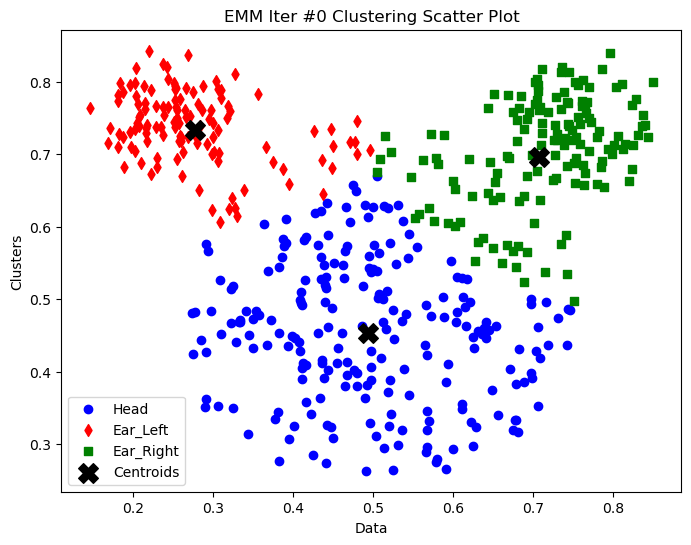

Epoch: 1, log_likelihood: 590.1392958146625
Cluster_0 (Heads) accuracy: 0.7896551724137931
Cluster_1 (Ear_Left) accuracy: 1.0
Cluster_2 (Ear_Right) accuracy: 1.0


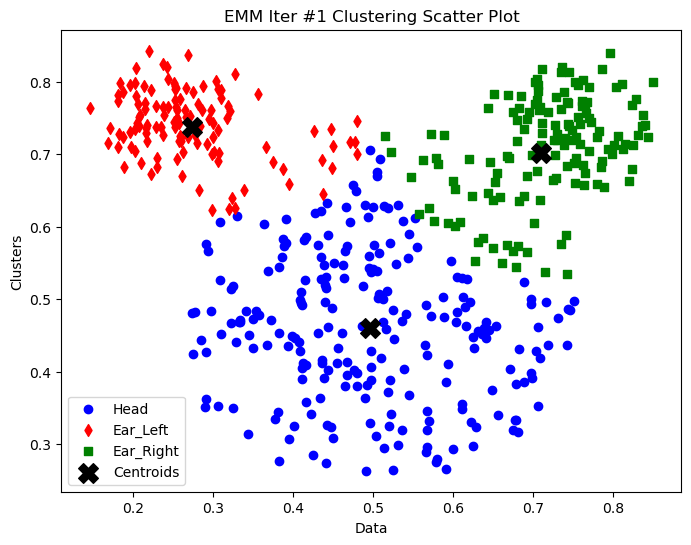

Epoch: 2, log_likelihood: 598.733869187986
Cluster_0 (Heads) accuracy: 0.8310344827586207
Cluster_1 (Ear_Left) accuracy: 1.0
Cluster_2 (Ear_Right) accuracy: 1.0


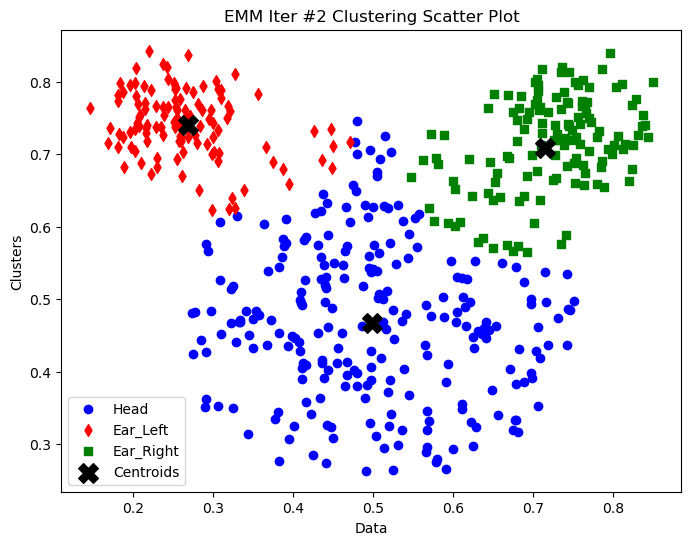

Epoch: 3, log_likelihood: 609.2167112559732
Cluster_0 (Heads) accuracy: 0.8620689655172413
Cluster_1 (Ear_Left) accuracy: 1.0
Cluster_2 (Ear_Right) accuracy: 1.0


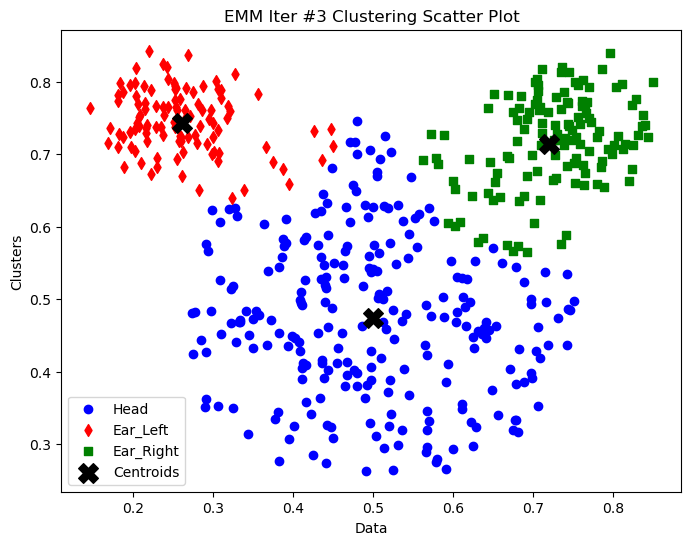

Epoch: 4, log_likelihood: 620.9138632828178
Cluster_0 (Heads) accuracy: 0.9103448275862069
Cluster_1 (Ear_Left) accuracy: 1.0
Cluster_2 (Ear_Right) accuracy: 1.0
Epoch: 5, log_likelihood: 629.3860292437188
Cluster_0 (Heads) accuracy: 0.9275862068965517
Cluster_1 (Ear_Left) accuracy: 1.0
Cluster_2 (Ear_Right) accuracy: 1.0
Epoch: 6, log_likelihood: 633.8381513232255
Cluster_0 (Heads) accuracy: 0.9551724137931035
Cluster_1 (Ear_Left) accuracy: 1.0
Cluster_2 (Ear_Right) accuracy: 1.0
Epoch: 7, log_likelihood: 636.1230574866853
Cluster_0 (Heads) accuracy: 0.9620689655172414
Cluster_1 (Ear_Left) accuracy: 1.0
Cluster_2 (Ear_Right) accuracy: 1.0
Epoch: 8, log_likelihood: 637.3477242462322
Cluster_0 (Heads) accuracy: 0.9724137931034482
Cluster_1 (Ear_Left) accuracy: 0.99
Cluster_2 (Ear_Right) accuracy: 1.0
Epoch: 9, log_likelihood: 638.0184176793659
Cluster_0 (Heads) accuracy: 0.9793103448275862
Cluster_1 (Ear_Left) accuracy: 0.99
Cluster_2 (Ear_Right) accuracy: 1.0
Epoch: 10, log_likelihood:

In [218]:
fin_params, likelihoods, fin_cm, fin_acc = EMM(cleaned_class_data, 50, predicted_labels, true_labels, 3, True)

In [222]:
print("Final confusion matrix\n",fin_cm)
print(f'Cluster_0 (Heads) accuracy: {fin_acc['Cluster_0']}')
print(f'Cluster_1 (Ear_Left) accuracy: {fin_acc['Cluster_1']}')
print(f'Cluster_2 (Ear_Right) accuracy: {fin_acc['Cluster_2']}')

Final confusion matrix
 Predicted    0   1    2
Actual                 
0          289   0    1
1            1  99    0
2            0   0  100
Cluster_0 (Heads) accuracy: 0.996551724137931
Cluster_1 (Ear_Left) accuracy: 0.99
Cluster_2 (Ear_Right) accuracy: 1.0
